Here we'll load the normalized lbt spectra and do the unveiled synthetic spectra

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d
import sys
import os
from scipy.ndimage.filters import gaussian_filter
sys.path.append("../interface/")
import synthetic_functions
%matplotlib notebook
plt.rcParams['font.family'] = "Times New Roman"

In [3]:
def MAD(input_vector):
    return np.median(np.abs(input_vector - np.median(input_vector)))

In [4]:
#### Load G77 spectra

#G77_blue = pd.read_csv("/Users/MasterD/Google Drive/Yoon_UMP/output/G77/g77-61_blue_sum.fitsnorm.dat")
G77_blue = pd.read_csv("/Users/MasterD/Google Drive/Yoon_UMP/output/G77/g77-61_blue_sum.fitsnorm_new.dat")
G77_m1b = pd.read_csv("/Users/MasterD/Google Drive/Yoon_UMP/output/G77/g77-61_m1b_otf_cr_sum.ms.w.fitsnorm.dat")
G77_m2b = pd.read_csv("/Users/MasterD/Google Drive/Yoon_UMP/output/G77/g77-61_m2b_otf_cr_sum.ms.w.fitsnorm.dat")


CV = pd.read_csv("/Users/MasterD/Google Drive/Yoon_UMP/output/G77/CVn_blue_may1b2b_jun1b.fitsnorm_full_niave.dat")

In [5]:
#### Some LIGHT smoothing might help.
sigma=0.75
CV['norm'] = gaussian_filter(CV['norm'], sigma=sigma)

### Dwarf runs

In [4]:
bounds = [3900, 4500]

dwarf_path = "/Users/MasterD/Google Drive/Yoon_UMP/output/dwarf/"
giant_path = "/Users/MasterD/Google Drive/Yoon_UMP/output/giant/"


###GI
group = "GI/"
synth_array = [pd.read_csv(dwarf_path + group + filename) for filename in os.listdir(dwarf_path + group)]
filenames = [filename for filename in os.listdir(dwarf_path + group)]
DWARF_GI_blue = synthetic_functions.compute_synthetic_array(G77_blue, synth_array, filenames, bounds)


###GII
group = "GII/"
synth_array = [pd.read_csv(dwarf_path + group + filename) for filename in os.listdir(dwarf_path + group)]
filenames = [filename for filename in os.listdir(dwarf_path + group)]
DWARF_GII_blue = synthetic_functions.compute_synthetic_array(G77_blue, synth_array, filenames, bounds)



###GII
group = "GIII/"
synth_array = [pd.read_csv(dwarf_path + group + filename) for filename in os.listdir(dwarf_path + group)]
filenames = [filename for filename in os.listdir(dwarf_path + group)]
DWARF_GIII_blue = synthetic_functions.compute_synthetic_array(G77_blue, synth_array, filenames, bounds)





In [23]:
def run(path, obs, group, bounds, caHK_CH=True):
    synth_array = [pd.read_csv(path + group + filename) for filename in os.listdir(path + group)]
    filenames = [filename for filename in os.listdir(path + group)]
    return synthetic_functions.compute_synthetic_array(obs, synth_array, filenames, bounds, caHK_CH)


In [32]:
bounds = [3900, 4500]

giant_path = '/Users/MasterD/Google Drive/Yoon_UMP/output/regroup/giant/'
dwarf_path = '/Users/MasterD/Google Drive/Yoon_UMP/output/dwarf/'

G77_BLUE_RUNS = {"group": ["GI", "GII", "GIII"],
                 "dwarf_chi": [run(dwarf_path, G77_blue, group, bounds) for group in ['GI/', 'GII/', 'GIII/']],
                 "giant_chi": [run(giant_path, G77_blue, group, bounds) for group in ['GI/', 'GII/', 'GIII/']]}


G77_M1B_RUNS = {"group": ["GI", "GII", "GIII"],
                "dwarf_chi": [run(dwarf_path, G77_m1b, group, bounds) for group in ['GI/', 'GII/', 'GIII/']],
                "giant_chi": [run(giant_path, G77_m1b, group, bounds) for group in ['GI/', 'GII/', 'GIII/']]}

G77_M2B_RUNS = {"group": ["GI", "GII", "GIII"],
                "dwarf_chi": [run(dwarf_path, G77_m2b, group, bounds) for group in ['GI/', 'GII/', 'GIII/']],
                "giant_chi": [run(giant_path, G77_m2b, group, bounds) for group in ['GI/', 'GII/', 'GIII/']]}



CV_GROUP_II = 'z-3.0c+2.25/'
CV_GROUP_III = 'z-3.25c+1.75/'
#CV_GROUP_III = 
CV_RUNS =  {"group": ["GI", "GII", "GIII"],
                "dwarf_chi": [run(dwarf_path, CV, group, bounds, caHK_CH=True) for group in ['GI/', 'GII/', 'GIII/']],
                "giant_chi": [run(giant_path, CV, group, bounds, caHK_CH=True) for group in ['GI/', 'GII/', 'GIII/']]} #['GI/', 'z-3.5c+2.5/', 'z-3.5c+2.75/']

In [24]:
New parameters for CVn groups

Group III: [Fe/H]=-3.5 A(C)=7.3 [C/Fe]=2.37
Group II:  [Fe/H]=-3.0 A(C)=6.3 [C/Fe]=0.87
Group I:   [Fe/H]=-1.5 A(C)=8.0 [C/Fe]=1.07

In [4]:
8.0 - 8.43 + 1.5

1.0700000000000003

In [25]:
CV_RUNS['giant_chi'][2]

,temp,chi2
0,4000.0,0.053493
1,4250.0,0.037066
2,4500.0,0.053340
3,4750.0,0.048998
4,5000.0,0.072777
5,5250.0,0.100547
6,5500.0,0.109251


<IPython.core.display.Javascript object>


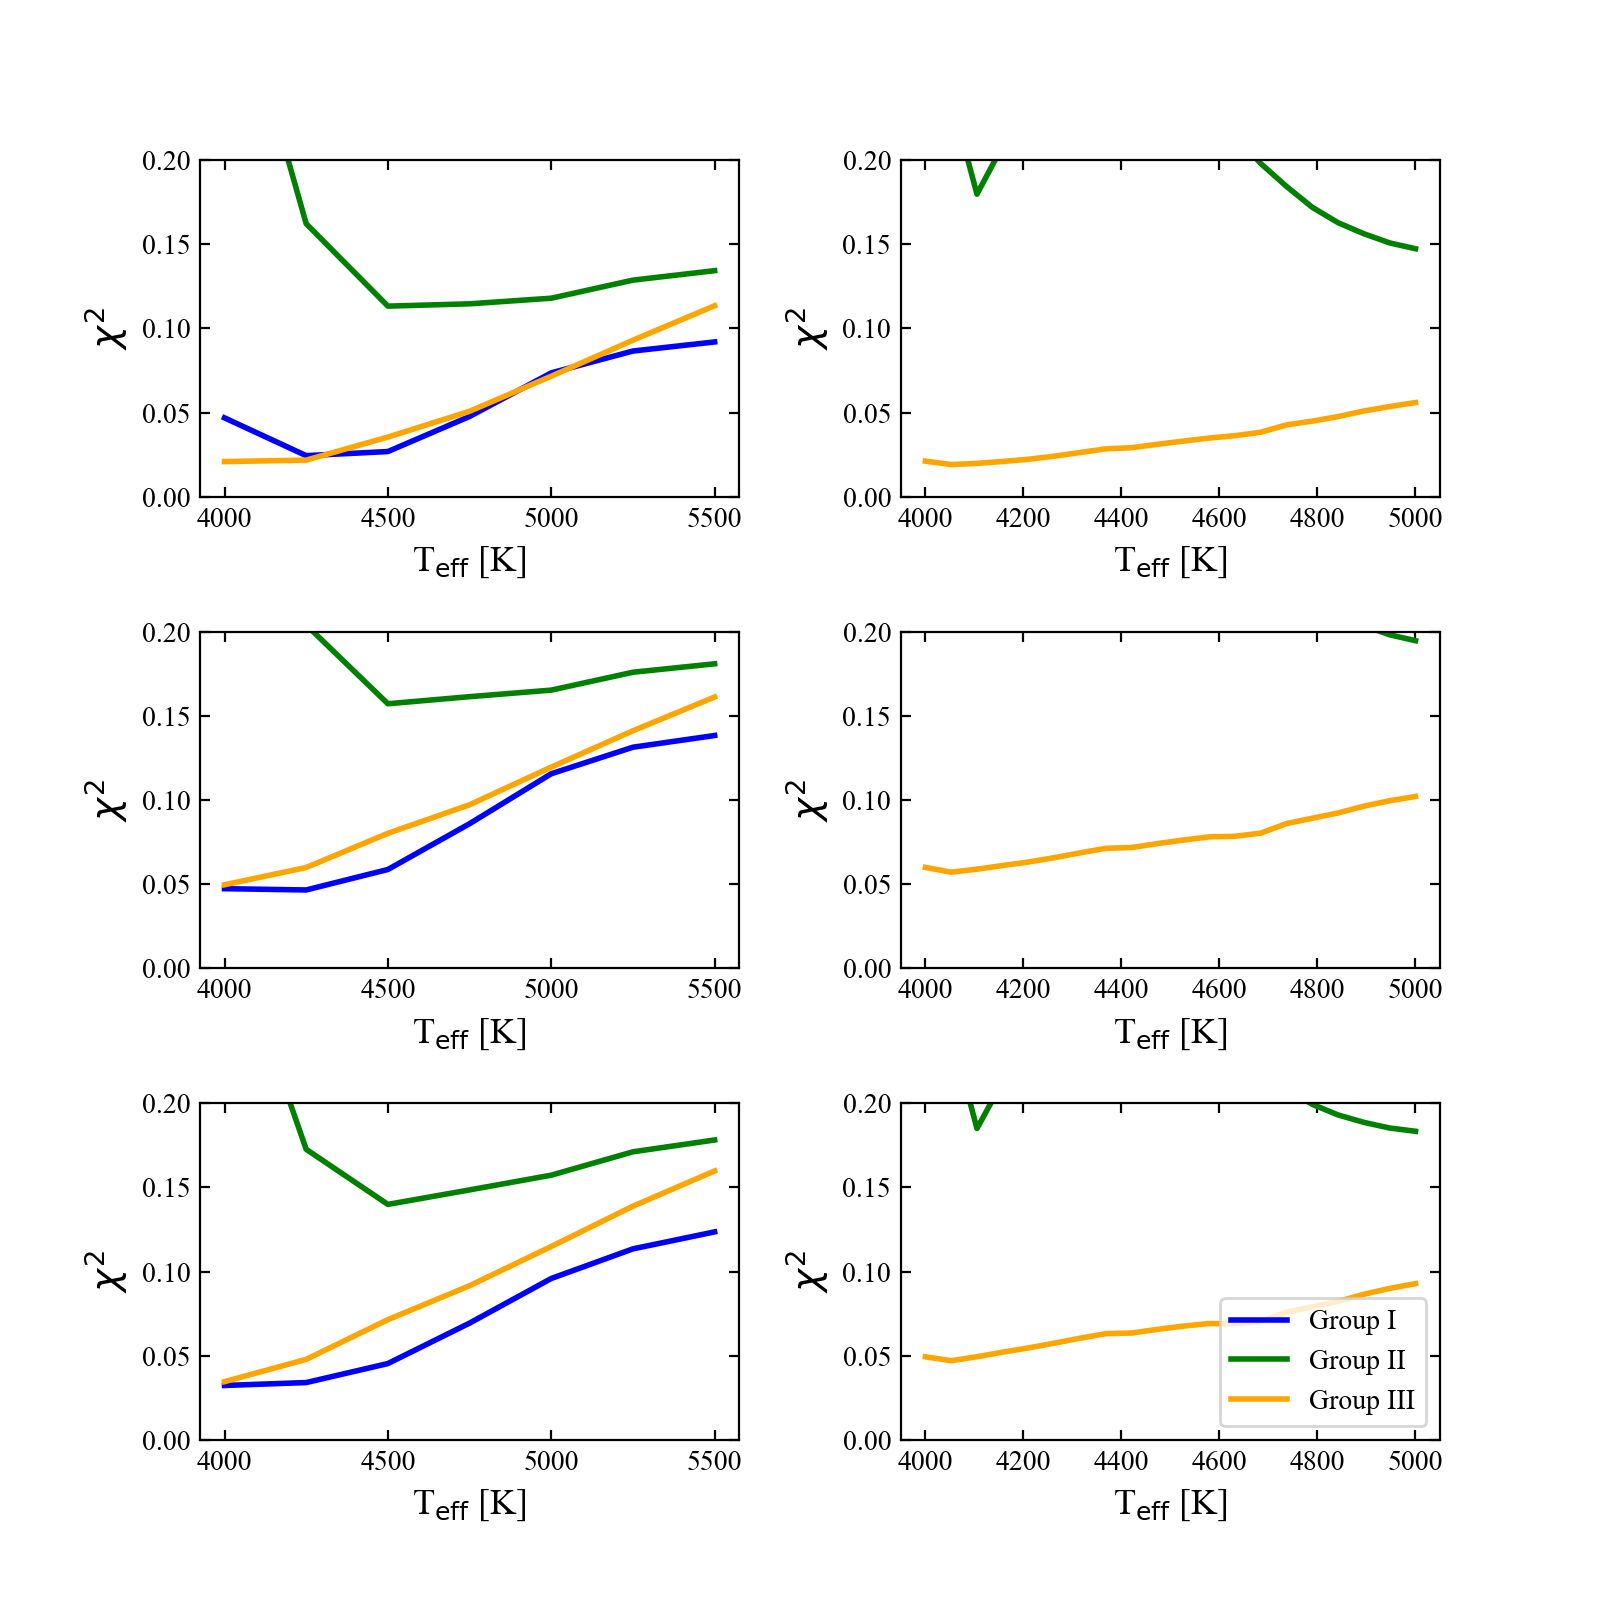

In [33]:
fig, ax = plt.subplots(3,2, figsize=(8,8))

###### G77 Blue
ax[0,0].plot(G77_BLUE_RUNS['dwarf_chi'][0].sort_values(by='temp')['temp'], 
             G77_BLUE_RUNS['dwarf_chi'][0].sort_values(by='temp')['chi2'], color="blue", linewidth=2)

ax[0,0].plot(G77_BLUE_RUNS['dwarf_chi'][1].sort_values(by='temp')['temp'], 
             G77_BLUE_RUNS['dwarf_chi'][1].sort_values(by='temp')['chi2'], color="green", linewidth=2)

ax[0,0].plot(G77_BLUE_RUNS['dwarf_chi'][2].sort_values(by='temp')['temp'], 
             G77_BLUE_RUNS['dwarf_chi'][2].sort_values(by='temp')['chi2'], color="orange", linewidth=2)




################################################################################


ax[0,1].plot(G77_BLUE_RUNS['giant_chi'][0].sort_values(by="temp")['temp'], 
             G77_BLUE_RUNS['giant_chi'][0].sort_values(by="temp")['chi2'], color="blue", linewidth=2)

ax[0,1].plot(G77_BLUE_RUNS['giant_chi'][1].sort_values(by="temp")['temp'], 
             G77_BLUE_RUNS['giant_chi'][1].sort_values(by="temp")['chi2'], color="green", linewidth=2)

ax[0,1].plot(G77_BLUE_RUNS['giant_chi'][2].sort_values(by="temp")['temp'], 
             G77_BLUE_RUNS['giant_chi'][2].sort_values(by="temp")['chi2'], color="orange", linewidth=2)


ax[1,0].plot(G77_M1B_RUNS['dwarf_chi'][0].sort_values(by="temp")['temp'], 
             G77_M1B_RUNS['dwarf_chi'][0].sort_values(by="temp")['chi2'], color="blue", linewidth=2)

ax[1,0].plot(G77_M1B_RUNS['dwarf_chi'][1].sort_values(by="temp")['temp'], 
             G77_M1B_RUNS['dwarf_chi'][1].sort_values(by="temp")['chi2'], color="green", linewidth=2)

ax[1,0].plot(G77_M1B_RUNS['dwarf_chi'][2].sort_values(by="temp")['temp'], 
             G77_M1B_RUNS['dwarf_chi'][2].sort_values(by="temp")['chi2'], color="orange", linewidth=2)


ax[1,1].plot(G77_M1B_RUNS['giant_chi'][0].sort_values(by="temp")['temp'], 
             G77_M1B_RUNS['giant_chi'][0].sort_values(by="temp")['chi2'], color="blue", linewidth=2)

ax[1,1].plot(G77_M1B_RUNS['giant_chi'][1].sort_values(by="temp")['temp'], 
             G77_M1B_RUNS['giant_chi'][1].sort_values(by="temp")['chi2'], color="green", linewidth=2)

ax[1,1].plot(G77_M1B_RUNS['giant_chi'][2].sort_values(by="temp")['temp'], 
             G77_M1B_RUNS['giant_chi'][2].sort_values(by="temp")['chi2'], color="orange", linewidth=2)


################################################################################

ax[2,0].plot(G77_M2B_RUNS['dwarf_chi'][0].sort_values(by="temp")['temp'], 
             G77_M2B_RUNS['dwarf_chi'][0].sort_values(by="temp")['chi2'], color="blue", linewidth=2)

ax[2,0].plot(G77_M2B_RUNS['dwarf_chi'][1].sort_values(by="temp")['temp'], 
             G77_M2B_RUNS['dwarf_chi'][1].sort_values(by="temp")['chi2'], color="green", linewidth=2)

ax[2,0].plot(G77_M2B_RUNS['dwarf_chi'][2].sort_values(by="temp")['temp'], 
             G77_M2B_RUNS['dwarf_chi'][2].sort_values(by="temp")['chi2'], color="orange", linewidth=2)


ax[2,1].plot(G77_M2B_RUNS['giant_chi'][0].sort_values(by="temp")['temp'], 
             G77_M2B_RUNS['giant_chi'][0].sort_values(by="temp")['chi2'], color="blue", linewidth=2, label='Group I')

ax[2,1].plot(G77_M2B_RUNS['giant_chi'][1].sort_values(by="temp")['temp'], 
             G77_M2B_RUNS['giant_chi'][1].sort_values(by="temp")['chi2'], color="green", linewidth=2, label='Group II')

ax[2,1].plot(G77_M2B_RUNS['giant_chi'][2].sort_values(by="temp")['temp'], 
             G77_M2B_RUNS['giant_chi'][2].sort_values(by="temp")['chi2'], color="orange", linewidth=2, label="Group III")

ax[2,1].legend(loc=4)


[label.tick_params(direction="in", top=True, right=True) for label in ax[:,0]]
[label.tick_params(direction="in", top=True, right=True) for label in ax[:,1]]
[label.set_ylim(0, 0.2) for label in ax[:, 1]]
[label.set_ylim(0, 0.2) for label in ax[:, 0]]


[label.set_ylabel(r"$\chi^2$", fontsize=14) for label in ax[:,0]]
[label.set_ylabel(r"$\chi^2$", fontsize=14) for label in ax[:,1]]
[label.set_xlabel(r"T$_{\rm eff}$ [K]", fontsize=13) for label in ax[:,0]]
[label.set_xlabel(r"T$_{\rm eff}$ [K]", fontsize=13) for label in ax[:,1]]


plt.subplots_adjust(bottom=0.1, right=0.9, top=0.9, wspace=0.30, hspace=0.4)
#plt.savefig("plots/G77_fitting.png")
plt.show()




<IPython.core.display.Javascript object>


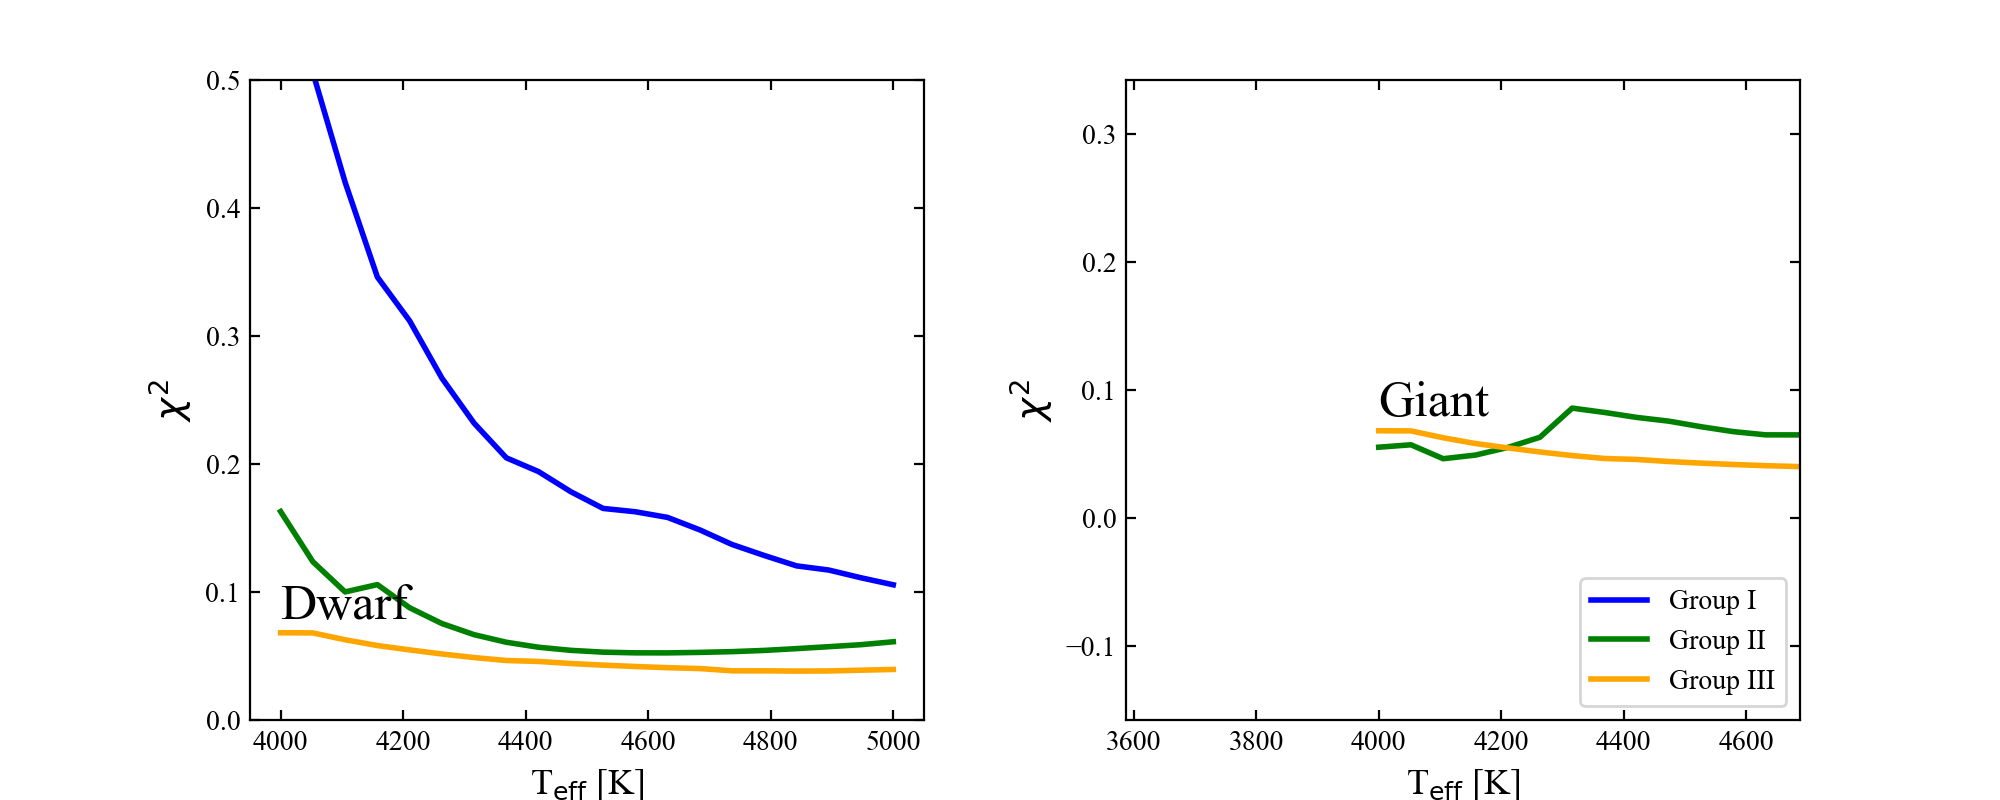

In [28]:
fig, ax = plt.subplots(1,2, figsize=(10,4))

###### G77 Blue
ax[0].plot(CV_RUNS['dwarf_chi'][0].sort_values(by="temp")['temp'], 
             CV_RUNS['dwarf_chi'][0].sort_values(by="temp")['chi2'], color="blue", linewidth=2)

ax[0].plot(CV_RUNS['dwarf_chi'][1].sort_values(by="temp")['temp'], 
             CV_RUNS['dwarf_chi'][1].sort_values(by="temp")['chi2'], color="green", linewidth=2)

ax[0].plot(CV_RUNS['dwarf_chi'][2].sort_values(by="temp")['temp'], 
             CV_RUNS['dwarf_chi'][2].sort_values(by="temp")['chi2'], color="orange", linewidth=2)




################################################################################
'z-3.0c+1.50/', 'z-3.0c+2.0/'

ax[1].plot(CV_RUNS['giant_chi'][0].sort_values(by="temp")['temp'], 
             CV_RUNS['giant_chi'][0].sort_values(by="temp")['chi2'], color="blue", linewidth=2, label ="Group I")

ax[1].plot(CV_RUNS['giant_chi'][1].sort_values(by="temp")['temp'], 
             CV_RUNS['giant_chi'][1].sort_values(by="temp")['chi2'], color="green", linewidth=2, label ="Group II")

ax[1].plot(CV_RUNS['giant_chi'][2].sort_values(by="temp")['temp'], 
             CV_RUNS['giant_chi'][2].sort_values(by="temp")['chi2'], color="orange", linewidth=2, label ="Group III")


ax[1].legend(loc=4)


[label.tick_params(direction="in", top=True, right=True) for label in ax]
[label.tick_params(direction="in", top=True, right=True) for label in ax]
#[label.set_ylim(0.075, 0.2) for label in ax]
[label.set_ylim(0.00, 0.5) for label in ax]


[label.set_ylabel(r"$\chi^2$", fontsize=14) for label in ax]
[label.set_ylabel(r"$\chi^2$", fontsize=14) for label in ax]
[label.set_xlabel(r"T$_{\rm eff}$ [K]", fontsize=13) for label in ax]
[label.set_xlabel(r"T$_{\rm eff}$ [K]", fontsize=13) for label in ax]

ax[0].text(4000, 0.08, "Dwarf", fontsize=18)
ax[1].text(4000, 0.08, 'Giant', fontsize=18)

plt.subplots_adjust(bottom=0.1, right=0.9, top=0.9, wspace=0.30, hspace=0.4)
#plt.savefig("plots/CV_fitting_v2.pdf", format="pdf")
plt.show()



### Just focus on the Giant class

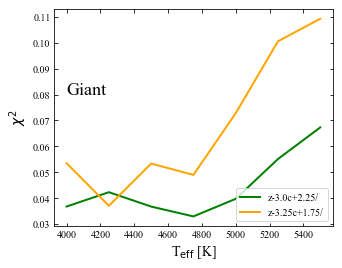

In [28]:
fig, ax = plt.subplots(1,1, figsize=(5,4))

################################################################################


#ax.plot(CV_RUNS['giant_chi'][0]['temp'], 
#             CV_RUNS['giant_chi'][0]['chi2'], color="blue", linewidth=2, label ="Group I")

ax.plot(CV_RUNS['giant_chi'][1]['temp'], 
             CV_RUNS['giant_chi'][1]['chi2'], color="green", linewidth=2, label =CV_GROUP_II)



ax.plot(CV_RUNS['giant_chi'][2]['temp'], 
             CV_RUNS['giant_chi'][2]['chi2'], color="orange", linewidth=2, label =CV_GROUP_III)


ax.legend(loc=4)


#[label.tick_params(direction="in", top=True, right=True) for label in ax]
#[label.tick_params(direction="in", top=True, right=True) for label in ax]

ax.tick_params(direction="in", top=True, right=True)

#[label.set_ylim(0.075, 0.2) for label in ax]
#[label.set_ylim(0.075, 0.2) for label in ax]
ax.set_ylabel(r"$\chi^2$", fontsize=14)
ax.set_xlabel(r"T$_{\rm eff}$ [K]", fontsize=14)

#[label.set_ylabel(r"$\chi^2$", fontsize=14) for label in ax]
#[label.set_ylabel(r"$\chi^2$", fontsize=14) for label in ax]
#[label.set_xlabel(r"T$_{\rm eff}$ [K]", fontsize=13) for label in ax]
#[label.set_xlabel(r"T$_{\rm eff}$ [K]", fontsize=13) for label in ax]

#ax[0].text(4000, 0.08, "Dwarf", fontsize=18)
ax.text(4000, 0.08, 'Giant', fontsize=18)

#plt.subplots_adjust(bottom=0.1, right=0.9, top=0.9, wspace=0.30, hspace=0.4)
#plt.savefig("plots/update/CV_fitting_z-3.5.pdf", format="pdf")
plt.show()

### Visualize the fit

In [82]:
synth = pd.read_csv(giant_path +"z-3.50c+2.00/" + "T4250g0.00z-3.50c+2.00norm_full.dat")
#synth = pd.read_csv(giant_path +"GIII_4.0/" + "T4250g0.00z-4.00c+2.50norm.dat")
#synth = pd.read_csv(giant_path +"GI/" + "T4750g1.50z-2.50c+2.00norm.dat")
#T4000g0.00z-4.50c+2.75norm.dat

synth_function = interp1d(synth['wave'], synth['norm'], kind='cubic')

<IPython.core.display.Javascript object>


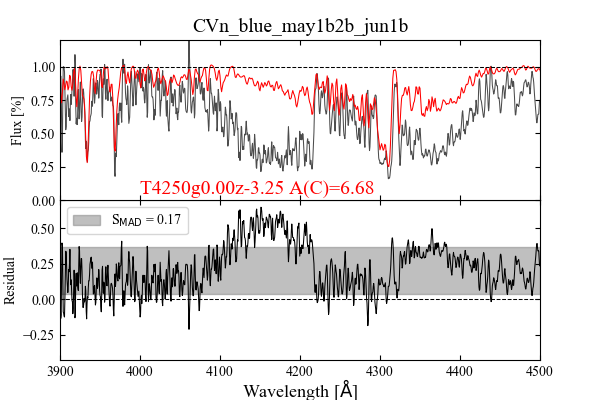

In [83]:
fig = plt.figure(figsize=(6, 4))

LOW_RES  = plt.axes([0.1, 0.1, 0.8, 0.4])
LOW_SPEC = plt.axes([0.1, 0.5, 0.8, 0.4])

HANDLE = [LOW_RES, LOW_SPEC]
linewidth=0.75
synth_color= "red"
spec_color="black"
alphaset=0.7
res_width=0.75
res_color="black"

####### G77_m1b
LOW_SPEC.plot(CV['wave'], CV['norm'], color=spec_color,
             alpha=alphaset, linewidth=linewidth)
LOW_SPEC.plot(synth['wave'], synth['norm'], linewidth=linewidth, color=synth_color)

CV_trim = CV[CV['wave'].between(3800, 4500, inclusive=True)]

LOW_RES.plot(CV_trim['wave'], synth_function(CV_trim['wave']) - CV_trim['norm'], linewidth=res_width, color=res_color,
            label="")

LOW_MAD = MAD(synth_function(CV_trim['wave']) - CV_trim['norm'])/0.6745
LOW_MEDIAN = np.median(synth_function(CV_trim['wave']) - CV_trim['norm'])

LOW_RES.fill_between(np.linspace(3800, 4500, 30), 
                     (LOW_MEDIAN-LOW_MAD)*np.ones(30), (LOW_MEDIAN+LOW_MAD)*np.ones(30),
                    color="grey", alpha=0.5, label=r"S$_{\rm MAD}$ = %.2f" % LOW_MAD)



LOW_SPEC.set_ylabel("Flux [%]")
LOW_RES.set_ylabel("Residual")
LOW_RES.set_xlabel(r"Wavelength [$\rm{\AA}$]", fontsize=13, labelpad=-1)




LOW_RES.legend()
LOW_SPEC.set_ylim([0, 1.2])
[label.set_xlim([3900, 4500]) for label in HANDLE]
plt.setp(LOW_SPEC.get_xticklabels(), visible=False)
[label.tick_params(direction="in", top=True, right=True) for label in HANDLE]

LOW_SPEC.set_title("CVn_blue_may1b2b_jun1b", fontsize=14)
LOW_SPEC.text(4000, 0.05, "T4250g0.00z-3.25 A(C)=6.68", fontsize=14, color="red")
#LOW_SPEC.set_title(4000, 0.1, "g77-61_m1b_otf_cr_sum.ms.w.fits")
#LOW_SPEC.text(4000, 0.1, "g77-61_m1b_otf_cr_sum.ms.w.fits", fontsize=12)

LOW_SPEC.axhline(1.0, linewidth=0.75, linestyle="--", color="black")
LOW_RES.axhline(0.0, linewidth=0.75, linestyle="--", color="black")


#plt.savefig("plots/update/CV_spec_fit_res_T4250g0.00z-3.25AC+6.68.pdf", format="pdf")

#g77-61_blue_sum.fitsnorm.dat")
#g77-61_m1b_otf_cr_sum.ms.w.fitsnorm.dat")
#g77-61_m2b_otf_cr_sum.ms.w.fitsnorm.dat")

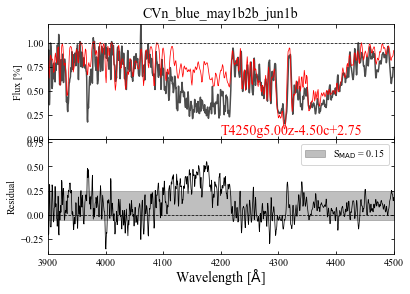

In [36]:
synth = pd.read_csv(dwarf_path +"GIII/" + "T4250g5.00z-4.50c+2.75norm.dat")

synth_function = interp1d(synth['wave'], synth['norm'], kind='cubic')


fig = plt.figure(figsize=(6, 4))

LOW_RES  = plt.axes([0.1, 0.1, 0.8, 0.4])
LOW_SPEC = plt.axes([0.1, 0.5, 0.8, 0.4])

HANDLE = [LOW_RES, LOW_SPEC]
linewidth=0.75
synth_color= "red"
spec_color="black"
alphaset=0.7
res_width=0.75
res_color="black"

####### G77_m1b
LOW_SPEC.plot(CV['wave'], CV['norm'], color=spec_color,
             alpha=alphaset)
LOW_SPEC.plot(synth['wave'], synth['norm'], linewidth=linewidth, color=synth_color)

CV_trim = CV[CV['wave'].between(3800, 4500, inclusive=True)]

LOW_RES.plot(CV_trim['wave'], synth_function(CV_trim['wave']) - CV_trim['norm'], linewidth=res_width, color=res_color,
            label="")

LOW_MAD = MAD(synth_function(CV_trim['wave']) - CV_trim['norm'])/0.6745
LOW_MEDIAN = np.median(synth_function(CV_trim['wave']) - CV_trim['norm'])

LOW_RES.fill_between(np.linspace(3800, 4500, 30), 
                     (LOW_MEDIAN-LOW_MAD)*np.ones(30), (LOW_MEDIAN+LOW_MAD)*np.ones(30),
                    color="grey", alpha=0.5, label=r"S$_{\rm MAD}$ = %.2f" % LOW_MAD)



LOW_SPEC.set_ylabel("Flux [%]")
LOW_RES.set_ylabel("Residual")
LOW_RES.set_xlabel(r"Wavelength [$\rm{\AA}$]", fontsize=14, labelpad=-1)




LOW_RES.legend()
LOW_SPEC.set_ylim([0, 1.2])
[label.set_xlim([3900, 4500]) for label in HANDLE]
plt.setp(LOW_SPEC.get_xticklabels(), visible=False)
[label.tick_params(direction="in", top=True, right=True) for label in HANDLE]

LOW_SPEC.set_title("CVn_blue_may1b2b_jun1b", fontsize=14)
LOW_SPEC.text(4200, 0.05, "T4250g5.00z-4.50c+2.75", fontsize=14, color="red")
#LOW_SPEC.set_title(4000, 0.1, "g77-61_m1b_otf_cr_sum.ms.w.fits")
#LOW_SPEC.text(4000, 0.1, "g77-61_m1b_otf_cr_sum.ms.w.fits", fontsize=12)

LOW_SPEC.axhline(1.0, linewidth=0.75, linestyle="--", color="black")
LOW_RES.axhline(0.0, linewidth=0.75, linestyle="--", color="black")


#plt.savefig("plots/CV_spec_fit_res_GIII_t4250.pdf", format="pdf")

#g77-61_blue_sum.fitsnorm.dat")
#g77-61_m1b_otf_cr_sum.ms.w.fitsnorm.dat")
#g77-61_m2b_otf_cr_sum.ms.w.fitsnorm.dat")

In [16]:
synth = pd.read_csv(dwarf_path +"GIII/" + "T4000g5.00z-4.50c+2.75norm.dat")

synth_function = interp1d(synth['wave'], synth['norm'], kind='cubic')

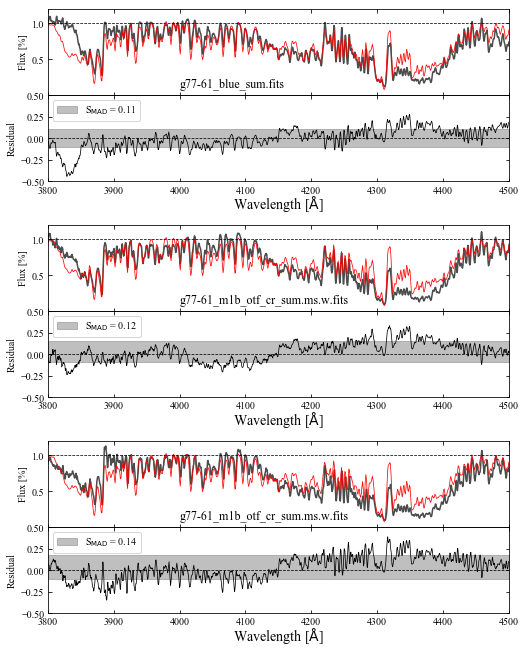

In [17]:

fig = plt.figure(figsize=(8, 10))

LOW_RES  = plt.axes([0.1, 0.1, 0.8, 0.12])
LOW_SPEC = plt.axes([0.1, 0.22, 0.8, 0.12])


MID_RES = plt.axes([0.1, 0.40, 0.8, 0.12])
MID_SPEC= plt.axes([0.1, 0.52, 0.8, 0.12])

HIGH_RES = plt.axes([0.1, 0.70, 0.8, 0.12])
HIGH_SPEC= plt.axes([0.1, 0.82, 0.8, 0.12])


SPEC_HANDLES = [LOW_SPEC, MID_SPEC, HIGH_SPEC]
RES_HANDLES  = [LOW_RES, MID_RES,  HIGH_RES]
linewidth=0.75
synth_color= "red"
spec_color="black"
alphaset=0.7
res_width=0.75
res_color="black"

####### G77_m1b
LOW_SPEC.plot(G77_m1b['wave'], G77_m1b['norm'], color=spec_color,
             alpha=alphaset)
LOW_SPEC.plot(synth['wave'], synth['norm'], linewidth=linewidth, color=synth_color)

m1b_trim = G77_m1b[G77_m1b['wave'].between(3800, 4500, inclusive=True)]

LOW_RES.plot(m1b_trim['wave'], synth_function(m1b_trim['wave']) - m1b_trim['norm'], linewidth=res_width, color=res_color,
            label="")

LOW_MAD = MAD(synth_function(m1b_trim['wave']) - m1b_trim['norm'])/0.6745
LOW_MEDIAN = np.median(synth_function(m1b_trim['wave']) - m1b_trim['norm'])

LOW_RES.fill_between(np.linspace(3800, 4500, 30), 
                     (LOW_MEDIAN-LOW_MAD)*np.ones(30), (LOW_MEDIAN+LOW_MAD)*np.ones(30),
                    color="grey", alpha=0.5, label=r"S$_{\rm MAD}$ = %.2f" % LOW_MAD)

####### G77_m2b
MID_SPEC.plot(G77_m2b['wave'], G77_m2b['norm'], color=spec_color,
             alpha=alphaset, label =None)
MID_SPEC.plot(synth['wave'], synth['norm'], linewidth=linewidth, color=synth_color, label =None)

m2b_trim = G77_m2b[G77_m2b['wave'].between(3800, 4500, inclusive=True)]

MID_RES.plot(m2b_trim['wave'], synth_function(m2b_trim['wave']) - m2b_trim['norm'], linewidth=res_width, color=res_color,
            label="")


MID_MAD = MAD(synth_function(m2b_trim['wave']) - m2b_trim['norm'])/0.6745
MID_MEDIAN = np.median(synth_function(m2b_trim['wave']) - m2b_trim['norm'])

MID_RES.fill_between(np.linspace(3800, 4500, 30), 
                     (MID_MEDIAN-MID_MAD)*np.ones(30), (MID_MEDIAN+MID_MAD)*np.ones(30),
                    color="grey", alpha=0.5, label=r"S$_{\rm MAD}$ = %.2f" % MID_MAD)



####### G77_blue
HIGH_SPEC.plot(G77_blue['wave'], G77_blue['norm'], color=spec_color,
              alpha=alphaset, label =None)
HIGH_SPEC.plot(synth['wave'], synth['norm'], linewidth=linewidth, color=synth_color)

blue_trim = G77_blue[G77_blue['wave'].between(3800, 4500, inclusive=True)]

HIGH_RES.plot(blue_trim['wave'], synth_function(blue_trim['wave']) - blue_trim['norm'], 
              linewidth=res_width, color=res_color, label="")

HIGH_MAD = MAD(synth_function(blue_trim['wave']) - blue_trim['norm'])/0.6745
HIGH_MEDIAN = np.median(synth_function(blue_trim['wave']) - blue_trim['norm'])

HIGH_RES.fill_between(np.linspace(3800, 4500, 30), 
                     (HIGH_MEDIAN-HIGH_MAD)*np.ones(30), (HIGH_MEDIAN+HIGH_MAD)*np.ones(30),
                    color="grey", alpha=0.5, label=r"S$_{\rm MAD}$ = %.2f" % HIGH_MAD)








#HIGH_SPEC.set_title("g77-61_blue_sum.fits")
HIGH_SPEC.text(4000, 0.1, "g77-61_blue_sum.fits", fontsize=12)

#MID_SPEC.set_title(4000, 0.1, "g77-61_m1b_otf_cr_sum.ms.w.fits")
MID_SPEC.text(4000, 0.1, "g77-61_m1b_otf_cr_sum.ms.w.fits", fontsize=12)

#LOW_SPEC.set_title(4000, 0.1, "g77-61_m1b_otf_cr_sum.ms.w.fits")
LOW_SPEC.text(4000, 0.1, "g77-61_m1b_otf_cr_sum.ms.w.fits", fontsize=12)


_ = [label.set_ylabel("Flux [%]") for label in SPEC_HANDLES]
_ = [label.set_ylabel("Residual") for label in RES_HANDLES]
_ = [label.set_xlabel(r"Wavelength [$\rm{\AA}$]", fontsize=14, labelpad=-1) for label in RES_HANDLES]


_ = [label.axhline(1.0, linewidth=0.75, linestyle="--", color="black") for label in SPEC_HANDLES]
_ = [label.axhline(0.0, linewidth=0.75, linestyle="--", color="black") for label in RES_HANDLES]
#plt.axes([0.1, .35, 0.8, 0.2])
#plt.axes([0.1, .55, 0.8, 0.2])


#plt.axes([0.1, .70, 0.8, 0.2])
#plt.axes([0.1, .95, 0.8, 0.2])
_ = [label.tick_params(direction="in", top=True, right=True) for label in SPEC_HANDLES]
_ = [label.tick_params(direction="in", top=True, right=True) for label in RES_HANDLES]

_ = [label.set_xlim([3800, 4500]) for label in SPEC_HANDLES]
_ = [label.set_xlim([3800, 4500]) for label in RES_HANDLES]

_ = [label.set_ylim([0, 1.2]) for label in SPEC_HANDLES]
_ = [label.set_ylim([-0.5, 0.5]) for label in RES_HANDLES]

_ = [plt.setp(label.get_xticklabels(), visible=False) for label in SPEC_HANDLES]


_ = [label.legend(loc=2) for label in RES_HANDLES]
####MAD/.6745

_ = [label.set_yticks([0.5, 1.0]) for label in SPEC_HANDLES]

plt.savefig("plots/G77_spec_fit_res_GIII_t4000.pdf", format="pdf")

#g77-61_blue_sum.fitsnorm.dat")
#g77-61_m1b_otf_cr_sum.ms.w.fitsnorm.dat")
#g77-61_m2b_otf_cr_sum.ms.w.fitsnorm.dat")

### FINAL PLOT G77 CV

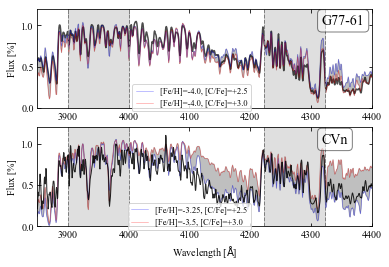

In [18]:
fig, ax = plt.subplots(2, 1)
linewidth=0.5
sigma=1
shade_alpha = 0.5
##### G77
synth_G77_low = pd.read_csv(dwarf_path +"GIII_4.0/" + "T4000g5.00z-4.00c+2.50norm.dat")
synth_G77_high = pd.read_csv(dwarf_path +"z-4.00c+3.00/" + "T4000g5.00z-4.00c+3.00norm.dat")

G77_synth_function = interp1d(synth['wave'], synth['norm'], kind='cubic')

ax[0].plot(G77_blue['wave'], gaussian_filter(G77_blue['norm'], sigma=sigma), color=spec_color,
              alpha=alphaset, label =None)



#for bounds in [(3900, 4000), (4222, 4322)]
ax[0].plot(synth_G77_low['wave'], synth_G77_low['norm'], linewidth=linewidth, 
           color="blue", label ="[Fe/H]=-4.0, [C/Fe]=+2.5", alpha=shade_alpha)

ax[0].plot(synth_G77_high['wave'], synth_G77_high['norm'], linewidth=linewidth, 
           color=synth_color, label ="[Fe/H]=-4.0, [C/Fe]=+3.0", alpha=shade_alpha)

ax[0].fill_between(synth_G77_low['wave'], synth_G77_high['norm'], synth_G77_low['norm'], color="grey", alpha=shade_alpha)


[label.fill_between(np.linspace(3900, 4000, 30), np.zeros(30), np.ones(30)*1.2, color="grey", alpha=0.25) for label in ax]
[label.fill_between(np.linspace(4222, 4322, 30), np.zeros(30), np.ones(30)*1.2, color="grey", alpha=0.25) for label in ax]

[label.axvline(3900, linestyle="--", color="grey", linewidth=1.0) for label in ax]
[label.axvline(4000, linestyle="--", color="grey", linewidth=1.0) for label in ax]
[label.axvline(4222, linestyle="--", color="grey", linewidth=1.0) for label in ax]
[label.axvline(4322, linestyle="--", color="grey", linewidth=1.0) for label in ax]


### CV
synth_CV_low = pd.read_csv(giant_path +"z-3.25c+2.25/" + "T4250g0.00z-3.25c+2.25norm.dat")
synth_CV_high = pd.read_csv(giant_path +"z-3.0c+2.25/" + "T4250g0.00z-3.00c+2.25norm.dat")

synth_function = interp1d(synth['wave'], synth['norm'], kind='cubic')


ax[1].plot(synth_CV_low['wave'], synth_CV_low['norm'], linewidth=linewidth, alpha=0.5, 
           color="blue", label =r'[Fe/H]=-3.25, [C/Fe]=+2.5')

ax[1].plot(synth_CV_high['wave'], synth_CV_high['norm'], linewidth=linewidth, alpha=0.5, 
           color=synth_color, label =r'[Fe/H]=-3.5, [C/Fe]=+3.0')



ax[1].fill_between(synth_CV_low['wave'], synth_CV_high['norm'], synth_CV_low['norm'], color="grey", alpha=0.5)

ax[1].plot(CV['wave'], gaussian_filter(CV['norm'], sigma=sigma), color=spec_color,
             alpha=0.85, linewidth=1)


###### Text boxes
props = dict(boxstyle='round', facecolor="white", alpha=0.5)
textstr = "G77-61"
ax[0].text(0.85, 0.95, textstr, transform=ax[0].transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

textstr = "CVn"
ax[1].text(0.85, 0.95, textstr, transform=ax[1].transAxes, fontsize=14,
        verticalalignment='top', bbox=props)


[label.legend(fontsize=8.5, bbox_to_anchor=(0.65, 0.28)) for label in ax]


[label.tick_params(direction="in", top=True, right=True) for label in ax]
[label.set_ylim([0., 1.2]) for label in ax]
[label.set_xlim([3850, 4400]) for label in ax]


[label.set_ylabel(r"Flux [%]") for label in ax]
ax[1].set_xlabel(r"Wavelength [$\rm{\AA}$]")


#plt.savefig("plots/CV_G77_synthetic_matching.pdf", format="pdf")
plt.show()

In [15]:
#fig, ax = plt.subplots(2, 1)
fig = plt.figure(figsize=(10,8))

#axRIGHT = plt.axes([0.8, 0.1, 0.1,0.8])

bot1 = 0.17
bot2 = 0.55
yscale = 0.25

ax = [plt.axes([0.05, bot2, 0.45,yscale]), plt.axes([0.05, bot1, 0.45,yscale])]

HK_ax = [plt.axes([0.50, bot2, 0.2,yscale]), plt.axes([0.50, bot1, 0.2,yscale])]
CH_ax = [plt.axes([0.70, bot2, 0.2,yscale]), plt.axes([0.70, bot1, 0.2,yscale])]


linewidth=0.75
sigma=0.25
shade_alpha = 0.5
##### G77
synth_G77_low = pd.read_csv(dwarf_path +"z-4.25c+3.00/" + "T4000g5.00z-4.25c+3.00norm.dat")
synth_G77_high = pd.read_csv(dwarf_path +"z-4.00c+3.25/" + "T4000g5.00z-4.00c+3.25norm.dat")

G77_synth_function = interp1d(synth['wave'], synth['norm'], kind='cubic')

[label[0].plot(G77_blue['wave'], gaussian_filter(G77_blue['norm'], sigma=sigma), linewidth=1., color=spec_color,
              alpha=0.85, label =None) for label in [ax,HK_ax, CH_ax]]

#[label[0].scatter(G77_blue['wave'], gaussian_filter(G77_blue['norm'], sigma=sigma), color=spec_color,
#              alpha=0.85, label =None, s=1) for label in [HK_ax, CH_ax]]


#for bounds in [(3900, 4000), (4222, 4322)]
[label[0].plot(synth_G77_low['wave'], synth_G77_low['norm'], linewidth=linewidth, 
           color="blue", label ="[Fe/H]=-4.25, A(C)=7.18", alpha=shade_alpha) for label in [HK_ax, CH_ax]]

[label[0].plot(synth_G77_high['wave'], synth_G77_high['norm'], linewidth=linewidth, 
           color=synth_color, label ="[Fe/H]=-4.00, A(C)=7.68", alpha=shade_alpha) for label in [HK_ax, CH_ax]]

[label[0].fill_between(synth_G77_low['wave'], synth_G77_high['norm'], synth_G77_low['norm'], 
                       color="grey", alpha=shade_alpha) for label in [HK_ax, CH_ax]]




[label.fill_between(np.linspace(3900, 4000, 30), np.zeros(30), np.ones(30)*1.3, color="grey", alpha=0.25) for label in ax]
[label.fill_between(np.linspace(4222, 4322, 30), np.zeros(30), np.ones(30)*1.3, color="grey", alpha=0.25) for label in ax]

edge_color='green'
#[label.axvline(3900, linestyle="--", color=edge_color, linewidth=1.0) for label in ax]
#[label.axvline(4000, linestyle="--", color=edge_color, linewidth=1.0) for label in ax]
#[label.axvline(4222, linestyle="--", color=edge_color, linewidth=1.0) for label in ax]
#[label.axvline(4322, linestyle="--", color=edge_color, linewidth=1.0) for label in ax]

giant_path = '/Users/masterd/Google Drive/Yoon_UMP/output/giant/interp/'
### CV
#synth_CV_low = pd.read_csv(giant_path +"z-3.5c+2/" + "T4250g0.00z-3.50c+2.50norm.dat")
synth_CV_low = pd.read_csv(giant_path +"T4200_AC6.5/" + "T4200.0000g0.20000000z-3.6842105c1.7542105.csvnorm_full.dat")
synth_CV_high = pd.read_csv(giant_path +"T4200_AC6.5/" + "T4200.0000g0.20000000z-3.3684211c1.4384211.csvnorm_full.dat")
#synth_CV_high = pd.read_csv(giant_path +"z-3.0c+0.75/" + "T4250g0.00z-3.00c+0.75norm.dat")

synth_function = interp1d(synth['wave'], synth['norm'], kind='cubic')


[label[1].plot(synth_CV_low['wave'], synth_CV_low['norm'], linewidth=linewidth, alpha=0.5, 
           color="blue", label =r'[Fe/H]=-3.25, A(C)=6.68') for label in [HK_ax, CH_ax]]

[label[1].plot(synth_CV_high['wave'], synth_CV_high['norm'], linewidth=linewidth, alpha=0.5, 
           color="red", label =r'[Fe/H]=-3.25, A(C)=6.93') for label in [HK_ax, CH_ax]]


#z=-3.00, c+2.25
#z=-3.25, c+2.25



#[label[1].fill_between(synth_CV_low['wave'], synth_CV_high['norm'], synth_CV_low['norm'], color="grey", alpha=0.5) 
#                         for label in [HK_ax, CH_ax]]

[label[1].plot(CV['wave'], gaussian_filter(CV['norm'], sigma=0.75), color=spec_color,
             alpha=0.85, linewidth=1) for label in [ax, HK_ax, CH_ax]]

#[label[1].scatter(CV['wave'], gaussian_filter(CV['norm'], sigma=sigma), color=spec_color,
#             alpha=0.85, s=1) for label in [HK_ax, CH_ax]]

#HK params
[label.set_xlim([3900, 4000]) for label in HK_ax]
[label.set_xticks([3925, 3950, 3975]) for label in HK_ax]
#[label.text(3920, 0.1, "CaII H& K") for label in HK_ax]
# CH params
[label.set_xlim([4222, 4322]) for label in CH_ax]
[label.set_xticks([4225, 4250, 4275, 4300, 4325]) for label in CH_ax]
#[label.text(4242, 0.1, "CH G-band") for label in CH_ax]



#### Annotations
ax[0].annotate("Ca II H", xy=(3969, 0.65), xytext=(3944, 0.22), 
               arrowprops=dict(arrowstyle="->", alpha=0.75, linestyle="dotted"), alpha=0.85)

ax[0].annotate("Ca II K", xy=(3934, 0.50), xytext=(3908, 0.08), 
               arrowprops=dict(arrowstyle="->", alpha=0.75, linestyle="dotted"), alpha=0.85)


ax[1].annotate("Ca II H", xy=(3969, 0.215), xytext=(3942, 0.02), 
               arrowprops=dict(arrowstyle="->", alpha=0.75, linestyle="dotted"), alpha=0.85)

ax[1].annotate("Ca II K", xy=(3934, 0.30), xytext=(3908, 0.09), 
               arrowprops=dict(arrowstyle="->", alpha=0.75, linestyle="dotted"), alpha=0.85)



HK_ax[0].annotate("Ca II H", xy=(3969, 0.60), xytext=(3958.7, 0.25), 
               arrowprops=dict(arrowstyle="->", alpha=0.75, linestyle="dotted"), alpha=0.85)

HK_ax[0].annotate("Ca II K", xy=(3934, 0.45), xytext=(3924., 0.05), 
               arrowprops=dict(arrowstyle="->", alpha=0.75, linestyle="dotted"), alpha=0.85)


HK_ax[1].text(3965, 0.1, "Ca II H", alpha=0.85)

HK_ax[1].text(3930,0.1, "Ca II K",alpha=0.85)



#[label.annotate("CH G-band", xy=(4200, 0.30), xytext=(4300, 0.09), 
#               arrowprops=dict(arrowstyle="->", alpha=0.65, linestyle="dotted")]

[label.text(4230, 1.1, "CH G-band", alpha=0.85) for label in ax]


###### Text boxes
props = dict(boxstyle='round', facecolor="white", alpha=0.5)
textstr = "G77-61"
#ax[0].text(0.95, 1.25, textstr, transform=ax[0].transAxes, fontsize=14,
#        verticalalignment='top', bbox=props)
ax[0].text(0.35, 0.12, textstr, transform=ax[0].transAxes, fontsize=14,
        verticalalignment='top', bbox=props)


textstr = "SDSSJ1327+3335"
#ax[1].text(0.865, 1.25, textstr, transform=ax[1].transAxes, fontsize=14,
#        verticalalignment='top', bbox=props)
ax[1].text(0.30, 0.12, textstr, transform=ax[1].transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

[label.legend(fontsize=9.5) for label in CH_ax]

[label.tick_params(labelright=True, labelleft=False) for label in CH_ax]
[label.yaxis.set_label_position("right") for label in CH_ax]
[[label.tick_params(direction="in", top=True, right=True) for label in axis] for axis in [ax, HK_ax, CH_ax]]


[[label.set_ylim([0., 1.3]) for label in axis] for axis in [ax, CH_ax, HK_ax]]
[label.set_xlim([3850, 4400]) for label in ax]


[[label.set_ylabel(r"Flux [%]") for label in axis] for axis in [ax, CH_ax]]
[[label.set_xlabel(r"$\lambda$ [$\rm{\AA}$]") for label in axis] for axis in [ax]]
[plt.setp(label.get_yticklabels(), visible=False) for label in HK_ax]



[label.spines['left'].set_linewidth(2.5) for label in HK_ax]
[label.spines['left'].set_linewidth(2.5) for label in CH_ax]
[label.spines['left'].set_alpha(0.5) for label in HK_ax]
[label.spines['left'].set_alpha(0.5) for label in CH_ax]


#plt.savefig("plots/CV_G77_synth_match_v4.pdf", format="pdf")

plt.show()

<IPython.core.display.Javascript object>

NameError: name 'synth' is not defined

In [87]:
### Interpolation Exercise

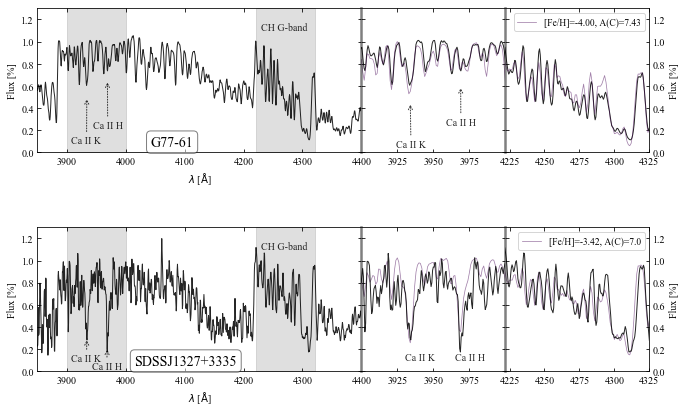

In [14]:
#fig, ax = plt.subplots(2, 1)
fig = plt.figure(figsize=(10,8))

#axRIGHT = plt.axes([0.8, 0.1, 0.1,0.8])

bot1 = 0.17
bot2 = 0.55
yscale = 0.25

ax = [plt.axes([0.05, bot2, 0.45,yscale]), plt.axes([0.05, bot1, 0.45,yscale])]

HK_ax = [plt.axes([0.50, bot2, 0.2,yscale]), plt.axes([0.50, bot1, 0.2,yscale])]
CH_ax = [plt.axes([0.70, bot2, 0.2,yscale]), plt.axes([0.70, bot1, 0.2,yscale])]


linewidth=0.75
sigma=0.25
shade_alpha = 0.5
spec_color="black"
synth_color="blue"

interpgiant_path = '/Users/masterd/Google Drive/Yoon_UMP/output/giant/interp/T4200_AC7.0/'
giant_path = '/Users/masterd/Google Drive/Yoon_UMP/output/giant/interp/'
### CV

##### G77
synth_G77_low = pd.read_csv(dwarf_path +"z-4.00c+3.00/" + "T4000g5.00z-4.00c+3.00norm.dat")
synth_G77_high = pd.read_csv(dwarf_path +"z-4.00c+3.00/" + "T4000g5.00z-4.00c+3.00norm.dat")

G77_synth_function = interp1d(synth_G77_low['wave'], synth_G77_low['norm'], kind='cubic')

[label[0].plot(G77_blue['wave'], gaussian_filter(G77_blue['norm'], sigma=sigma), linewidth=1., color=spec_color,
              alpha=0.85, label =None) for label in [ax,HK_ax, CH_ax]]

#[label[0].scatter(G77_blue['wave'], gaussian_filter(G77_blue['norm'], sigma=sigma), color=spec_color,
#              alpha=0.85, label =None, s=1) for label in [HK_ax, CH_ax]]


cv_specs = [pd.read_csv(interpgiant_path + cfile) for cfile in os.listdir(interpgiant_path)]
palette=plt.cm.viridis(np.linspace(0,1,len(cv_specs[10:11])))

#for bounds in [(3900, 4000), (4222, 4322)]
files = os.listdir()
[label[0].plot(synth_G77_low['wave'], synth_G77_low['norm'], linewidth=linewidth, 
           color=palette[0], label =r'[Fe/H]=-4.00, A(C)=7.43', alpha=shade_alpha) for label in [HK_ax, CH_ax]]

#[label[0].plot(synth_G77_high['wave'], synth_G77_high['norm'], linewidth=linewidth, 
#           color=synth_color, label =None, alpha=shade_alpha) for label in [HK_ax, CH_ax]]

#[label[0].fill_between(synth_G77_low['wave'], synth_G77_high['norm'], synth_G77_low['norm'], 
#                       color="grey", alpha=shade_alpha) for label in [HK_ax, CH_ax]]




[label.fill_between(np.linspace(3900, 4000, 30), np.zeros(30), np.ones(30)*1.3, color="grey", alpha=0.25) for label in ax]
[label.fill_between(np.linspace(4222, 4322, 30), np.zeros(30), np.ones(30)*1.3, color="grey", alpha=0.25) for label in ax]

edge_color='green'
#[label.axvline(3900, linestyle="--", color=edge_color, linewidth=1.0) for label in ax]
#[label.axvline(4000, linestyle="--", color=edge_color, linewidth=1.0) for label in ax]
#[label.axvline(4222, linestyle="--", color=edge_color, linewidth=1.0) for label in ax]
#[label.axvline(4322, linestyle="--", color=edge_color, linewidth=1.0) for label in ax]



#synth_CV_low = pd.read_csv(giant_path +"z-3.5c+2/" + "T4250g0.00z-3.50c+2.50norm.dat")
synth_CV_low = pd.read_csv(giant_path +"T4200_AC6.5/" + "T4200.0000g0.20000000z-3.6842105c1.7542105.csvnorm_full.dat")
synth_CV_high = pd.read_csv(giant_path +"T4200_AC6.5/" + "T4200.0000g0.20000000z-3.3684211c1.4384211.csvnorm_full.dat")
#synth_CV_high = pd.read_csv(giant_path +"z-3.0c+0.75/" + "T4250g0.00z-3.00c+0.75norm.dat")

#synth_function = interp1d(synth['wave'], synth['norm'], kind='cubic')


for i,spec in enumerate(cv_specs[8:9]):
    [label[1].plot(spec['wave'], spec['norm'], linewidth=linewidth, alpha=0.5, 
           color=palette[i], label =r'[Fe/H]=-3.42, A(C)=7.0') for label in [HK_ax, CH_ax]]
    
#T4200.0000g0.20000000z-3.5263158c2.0963158
    #[label[1].plot(spec['wave'], spec['norm'], linewidth=linewidth, alpha=0.5, 
     #      color="red", label =r'[Fe/H]=-3.25, A(C)=6.93') for label in [HK_ax, CH_ax]]
    
    


#z=-3.00, c+2.25
#z=-3.25, c+2.25



#[label[1].fill_between(synth_CV_low['wave'], synth_CV_high['norm'], synth_CV_low['norm'], color="grey", alpha=0.5) 
#                         for label in [HK_ax, CH_ax]]

[label[1].plot(CV['wave'], gaussian_filter(CV['norm'], sigma=0.75), color=spec_color,
             alpha=0.85, linewidth=1) for label in [ax, HK_ax, CH_ax]]

#[label[1].scatter(CV['wave'], gaussian_filter(CV['norm'], sigma=sigma), color=spec_color,
#             alpha=0.85, s=1) for label in [HK_ax, CH_ax]]

#HK params
[label.set_xlim([3900, 4000]) for label in HK_ax]
[label.set_xticks([3925, 3950, 3975]) for label in HK_ax]
#[label.text(3920, 0.1, "CaII H& K") for label in HK_ax]
# CH params
[label.set_xlim([4222, 4322]) for label in CH_ax]
[label.set_xticks([4225, 4250, 4275, 4300, 4325]) for label in CH_ax]
#[label.text(4242, 0.1, "CH G-band") for label in CH_ax]



#### Annotations
ax[0].annotate("Ca II H", xy=(3969, 0.65), xytext=(3944, 0.22), 
               arrowprops=dict(arrowstyle="->", alpha=0.75, linestyle="dotted"), alpha=0.85)

ax[0].annotate("Ca II K", xy=(3934, 0.50), xytext=(3908, 0.08), 
               arrowprops=dict(arrowstyle="->", alpha=0.75, linestyle="dotted"), alpha=0.85)


ax[1].annotate("Ca II H", xy=(3969, 0.215), xytext=(3942, 0.02), 
               arrowprops=dict(arrowstyle="->", alpha=0.75, linestyle="dotted"), alpha=0.85)

ax[1].annotate("Ca II K", xy=(3934, 0.30), xytext=(3908, 0.09), 
               arrowprops=dict(arrowstyle="->", alpha=0.75, linestyle="dotted"), alpha=0.85)



HK_ax[0].annotate("Ca II H", xy=(3969, 0.60), xytext=(3958.7, 0.25), 
               arrowprops=dict(arrowstyle="->", alpha=0.75, linestyle="dotted"), alpha=0.85)

HK_ax[0].annotate("Ca II K", xy=(3934, 0.45), xytext=(3924., 0.05), 
               arrowprops=dict(arrowstyle="->", alpha=0.75, linestyle="dotted"), alpha=0.85)


HK_ax[1].text(3965, 0.1, "Ca II H", alpha=0.85)

HK_ax[1].text(3930,0.1, "Ca II K",alpha=0.85)



#[label.annotate("CH G-band", xy=(4200, 0.30), xytext=(4300, 0.09), 
#               arrowprops=dict(arrowstyle="->", alpha=0.65, linestyle="dotted")]

[label.text(4230, 1.1, "CH G-band", alpha=0.85) for label in ax]


###### Text boxes
props = dict(boxstyle='round', facecolor="white", alpha=0.5)
textstr = "G77-61"
#ax[0].text(0.95, 1.25, textstr, transform=ax[0].transAxes, fontsize=14,
#        verticalalignment='top', bbox=props)
ax[0].text(0.35, 0.12, textstr, transform=ax[0].transAxes, fontsize=14,
        verticalalignment='top', bbox=props)


textstr = "SDSSJ1327+3335"
#ax[1].text(0.865, 1.25, textstr, transform=ax[1].transAxes, fontsize=14,
#        verticalalignment='top', bbox=props)
ax[1].text(0.30, 0.12, textstr, transform=ax[1].transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

[label.legend(fontsize=9.5) for label in CH_ax]

[label.tick_params(labelright=True, labelleft=False) for label in CH_ax]
[label.yaxis.set_label_position("right") for label in CH_ax]
[[label.tick_params(direction="in", top=True, right=True) for label in axis] for axis in [ax, HK_ax, CH_ax]]


[[label.set_ylim([0., 1.3]) for label in axis] for axis in [ax, CH_ax, HK_ax]]
[label.set_xlim([3850, 4400]) for label in ax]


[[label.set_ylabel(r"Flux [%]") for label in axis] for axis in [ax, CH_ax]]
[[label.set_xlabel(r"$\lambda$ [$\rm{\AA}$]") for label in axis] for axis in [ax]]
[plt.setp(label.get_yticklabels(), visible=False) for label in HK_ax]



[label.spines['left'].set_linewidth(2.5) for label in HK_ax]
[label.spines['left'].set_linewidth(2.5) for label in CH_ax]
[label.spines['left'].set_alpha(0.5) for label in HK_ax]
[label.spines['left'].set_alpha(0.5) for label in CH_ax]


plt.savefig("plots/CV_G77_synth_match_v5.pdf", format="pdf")

plt.show()

In [12]:
### Final Parameters for G77 and CVn

G77 : 4000 K log(g)=5.0, [Fe/H]=-4.00, A(C)=7.29, [C/Fe]=2.86 [2.68,3.04]
CVn : 4200 K log(g)=0.2, [Fe/H]=-3.25, A(C)=6.70, [C/Fe]=1.52 [1.28, 1.76]

['T4200.0000g0.20000000z-3.4210526c1.9910526.csvnorm_full.dat']

In [10]:
import ac

In [21]:
ac.ac(3.04,-4.0)

7.47

In [7]:
G77_synth_F = pd.read_csv('/Users/MasterD/Google Drive/Yoon_UMP/output/G77/final/T4000.0000g5.0000000z-4.0000000c2.8491667.csvnorm_new.dat')
G77_synth_low = pd.read_csv('/Users/MasterD/Google Drive/Yoon_UMP/output/G77/final/T4000.0000g5.0000000z-4.0000000c2.7075000.csvnorm_full.dat')
G77_synth_high = pd.read_csv('/Users/MasterD/Google Drive/Yoon_UMP/output/G77/final/T4000.0000g5.0000000z-4.0000000c3.0616667.csvnorm_full.dat')


##
#CVn_synth_F = pd.read_csv('/Users/MasterD/Google Drive/Yoon_UMP/output/CVn/final/T4200.0000g0.10000000z-3.2500000c1.5325000.csvnorm_full.dat')
CVn_synth_F = pd.read_csv('/Users/MasterD/Google Drive/Yoon_UMP/output/CVn/final/T4200.0000g0.10000000z-3.2500000c1.5325000.csvnorm_full.dat')
CVn_synth_low = pd.read_csv('/Users/MasterD/Google Drive/Yoon_UMP/output/CVn/final/T4200.0000g0.10000000z-3.2500000c1.3200000.csvnorm_full.dat')
CVn_synth_high = pd.read_csv('/Users/MasterD/Google Drive/Yoon_UMP/output/CVn/final/T4200.0000g0.10000000z-3.2500000c1.7450000.csvnorm_full.dat')
#T4200.0000g0.20000000z-3.3333333c1.5033333.csvnorm_full.dat

In [6]:
G77_blue = pd.read_csv("/Users/MasterD/Google Drive/Yoon_UMP/output/G77/g77-61_blue_sum.fitsnorm_new.dat")

### Final Plot

<IPython.core.display.Javascript object>


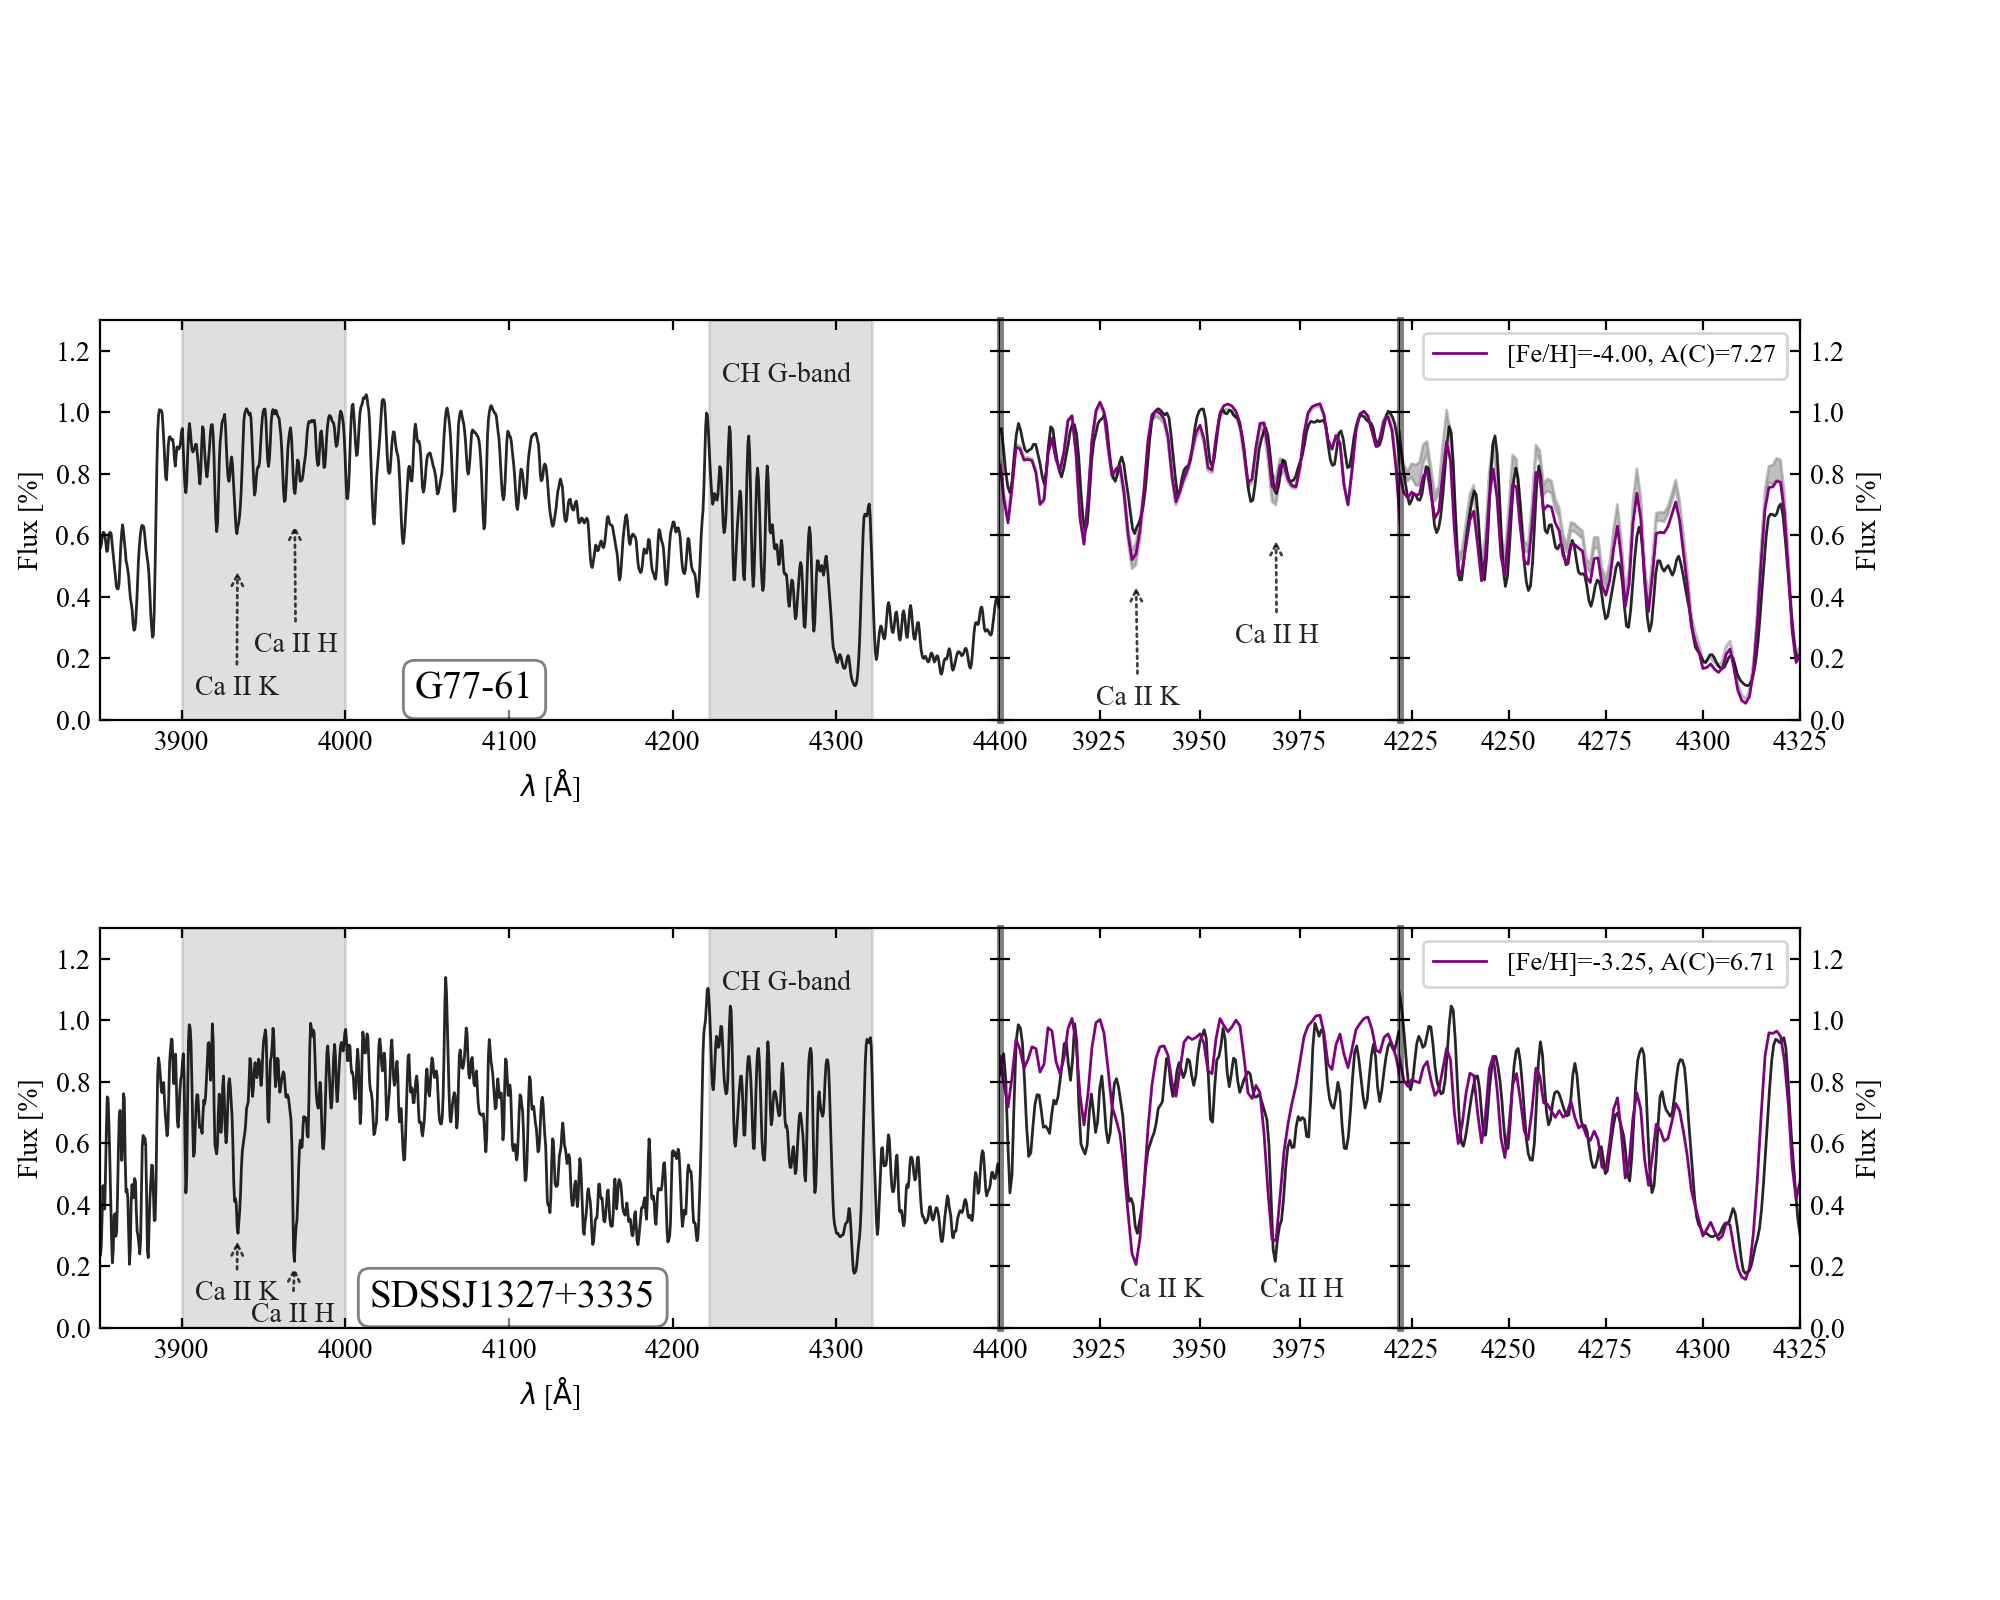

In [20]:

fig = plt.figure(figsize=(10,8))



bot1 = 0.17
bot2 = 0.55
yscale = 0.25

ax = [plt.axes([0.05, bot2, 0.45,yscale]), plt.axes([0.05, bot1, 0.45,yscale])]

HK_ax = [plt.axes([0.50, bot2, 0.2,yscale]), plt.axes([0.50, bot1, 0.2,yscale])]
CH_ax = [plt.axes([0.70, bot2, 0.2,yscale]), plt.axes([0.70, bot1, 0.2,yscale])]


linewidth=0.75
sigma=0.25
shade_alpha = 0.5
spec_color="black"
synth_color="blue"




##### G77


[label[0].plot(G77_blue['wave'], gaussian_filter(G77_blue['norm'], sigma=sigma), linewidth=1., color=spec_color,
              alpha=0.85, label =None) for label in [ax,HK_ax, CH_ax]]


##### CVn
[label[1].plot(CV['wave'], gaussian_filter(CV['norm'], sigma=0.75), color=spec_color,
             alpha=0.85, linewidth=1) for label in [ax, HK_ax, CH_ax]]



#### Synthetic Matches

[label[0].plot(G77_synth_F['wave'], G77_synth_F['norm'], color="purple", linewidth=1.0, label="[Fe/H]=-4.00, A(C)=7.27") for label in [HK_ax, CH_ax]]
[label[0].fill_between(G77_synth_low['wave'], G77_synth_low['norm'], G77_synth_high['norm'], color="grey", alpha=0.5) for label in [HK_ax, CH_ax]]
#CH_ax[0].plot(G77_synth_high['wave'], G77_synth_high['norm'])


[label[1].plot(CVn_synth_F['wave'], CVn_synth_F['norm'], color="purple", linewidth=1.0, label="[Fe/H]=-3.25, A(C)=6.71") for label in [HK_ax, CH_ax]]
#CH_ax[1].fill_between(CVn_synth_low['wave'], CVn_synth_low['norm'], CVn_synth_high['norm'], color="grey", alpha=0.5)
#CH_ax[1].plot(G77_synth_high['wave'], G77_synth_high['norm'])





[label.fill_between(np.linspace(3900, 4000, 30), np.zeros(30), np.ones(30)*1.3, color="grey", alpha=0.25) for label in ax]
[label.fill_between(np.linspace(4222, 4322, 30), np.zeros(30), np.ones(30)*1.3, color="grey", alpha=0.25) for label in ax]

edge_color='green'






#HK params
[label.set_xlim([3900, 4000]) for label in HK_ax]
[label.set_xticks([3925, 3950, 3975]) for label in HK_ax]
#[label.text(3920, 0.1, "CaII H& K") for label in HK_ax]
# CH params
[label.set_xlim([4222, 4322]) for label in CH_ax]
[label.set_xticks([4225, 4250, 4275, 4300, 4325]) for label in CH_ax]
#[label.text(4242, 0.1, "CH G-band") for label in CH_ax]



#### Annotations
ax[0].annotate("Ca II H", xy=(3969, 0.65), xytext=(3944, 0.22), 
               arrowprops=dict(arrowstyle="->", alpha=0.75, linestyle="dotted"), alpha=0.85)

ax[0].annotate("Ca II K", xy=(3934, 0.50), xytext=(3908, 0.08), 
               arrowprops=dict(arrowstyle="->", alpha=0.75, linestyle="dotted"), alpha=0.85)


ax[1].annotate("Ca II H", xy=(3969, 0.215), xytext=(3942, 0.02), 
               arrowprops=dict(arrowstyle="->", alpha=0.75, linestyle="dotted"), alpha=0.85)

ax[1].annotate("Ca II K", xy=(3934, 0.30), xytext=(3908, 0.09), 
               arrowprops=dict(arrowstyle="->", alpha=0.75, linestyle="dotted"), alpha=0.85)



HK_ax[0].annotate("Ca II H", xy=(3969, 0.60), xytext=(3958.7, 0.25), 
               arrowprops=dict(arrowstyle="->", alpha=0.75, linestyle="dotted"), alpha=0.85)

HK_ax[0].annotate("Ca II K", xy=(3934, 0.45), xytext=(3924., 0.05), 
               arrowprops=dict(arrowstyle="->", alpha=0.75, linestyle="dotted"), alpha=0.85)


HK_ax[1].text(3965, 0.1, "Ca II H", alpha=0.85)

HK_ax[1].text(3930,0.1, "Ca II K",alpha=0.85)


[label.text(4230, 1.1, "CH G-band", alpha=0.85) for label in ax]


###### Text boxes
props = dict(boxstyle='round', facecolor="white", alpha=0.5)
textstr = "G77-61"

ax[0].text(0.35, 0.12, textstr, transform=ax[0].transAxes, fontsize=14,
        verticalalignment='top', bbox=props)


textstr = "SDSSJ1327+3335"
#ax[1].text(0.865, 1.25, textstr, transform=ax[1].transAxes, fontsize=14,
#        verticalalignment='top', bbox=props)
ax[1].text(0.30, 0.12, textstr, transform=ax[1].transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

[label.legend(fontsize=9.5) for label in CH_ax]

[label.tick_params(labelright=True, labelleft=False) for label in CH_ax]
[label.yaxis.set_label_position("right") for label in CH_ax]
[[label.tick_params(direction="in", top=True, right=True) for label in axis] for axis in [ax, HK_ax, CH_ax]]


[[label.set_ylim([0., 1.3]) for label in axis] for axis in [ax, CH_ax, HK_ax]]
[label.set_xlim([3850, 4400]) for label in ax]


[[label.set_ylabel(r"Flux [%]") for label in axis] for axis in [ax, CH_ax]]
[[label.set_xlabel(r"$\lambda$ [$\rm{\AA}$]") for label in axis] for axis in [ax]]
[plt.setp(label.get_yticklabels(), visible=False) for label in HK_ax]



[label.spines['left'].set_linewidth(2.5) for label in HK_ax]
[label.spines['left'].set_linewidth(2.5) for label in CH_ax]
[label.spines['left'].set_alpha(0.5) for label in HK_ax]
[label.spines['left'].set_alpha(0.5) for label in CH_ax]


#plt.savefig("plots/CV_G77_synth_match_v5.pdf", format="pdf")

plt.show()

In [52]:
ac.cfe(7.29+0.18,-4.0)

3.04

In [64]:
G77_synth_low['wave'] -G77_synth_high['wave']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
6       0.0
7       0.0
8       0.0
9       0.0
10      0.0
11      0.0
12      0.0
13      0.0
14      0.0
15      0.0
16      0.0
17      0.0
18      0.0
19      0.0
20      0.0
21      0.0
22      0.0
23      0.0
24      0.0
25      0.0
26      0.0
27      0.0
28      0.0
29      0.0
       ... 
6971    0.0
6972    0.0
6973    0.0
6974    0.0
6975    0.0
6976    0.0
6977    0.0
6978    0.0
6979    0.0
6980    0.0
6981    0.0
6982    0.0
6983    0.0
6984    0.0
6985    0.0
6986    0.0
6987    0.0
6988    0.0
6989    0.0
6990    0.0
6991    0.0
6992    0.0
6993    0.0
6994    0.0
6995    0.0
6996    0.0
6997    0.0
6998    0.0
6999    0.0
7000    0.0
Name: wave, Length: 7001, dtype: float64